## EDA on sentence_text

In [1]:
import os
os.getcwd()

'c:\\Users\\Tristan\\Desktop\\Capstone ML and Data privacy\\capstone-repo\\code'

In [2]:
import pandas as pd
import sklearn
import seaborn as sns

PATH = r"../dataset/concat_sentence_text.csv"


In [3]:
df = pd.read_csv(PATH)
df.head()

,sentence_text,practice,modality
0,"IP ADDRESS, COOKIES, AND WEB BEACONS",Identifier_Cookie_or_similar_Tech_1stParty,PERFORMED
1,"IP ADDRESS, COOKIES, AND WEB BEACONS",Identifier_IP_Address_1stParty,PERFORMED
2,"IP addresses will be collected, along with inf...",Identifier_IP_Address_1stParty,PERFORMED
3,The information that our products collect incl...,Identifier_Cookie_or_similar_Tech_1stParty,PERFORMED
4,The information that our products collect incl...,Identifier_IP_Address_1stParty,PERFORMED


In [4]:
# Number of records
print(len(df))

18829


### Counts per each practice
Taking into account that one sentence can have multiple labels

In [5]:
# Counts of each practice
df_by_practice = df["practice"].value_counts(sort = True).rename_axis('practice').reset_index(name = "counts")
df_by_practice

,practice,counts
0,Identifier_Cookie_or_similar_Tech_1stParty,2107
1,Contact_E_Mail_Address_1stParty,2106
2,Location_1stParty,1514
3,Identifier_Cookie_or_similar_Tech_3rdParty,1250
4,Identifier_IP_Address_1stParty,1005
5,Contact_Phone_Number_1stParty,970
6,Identifier_Device_ID_1stParty,697
7,Contact_Postal_Address_1stParty,597
8,SSO,504
9,Demographic_Age_1stParty,428


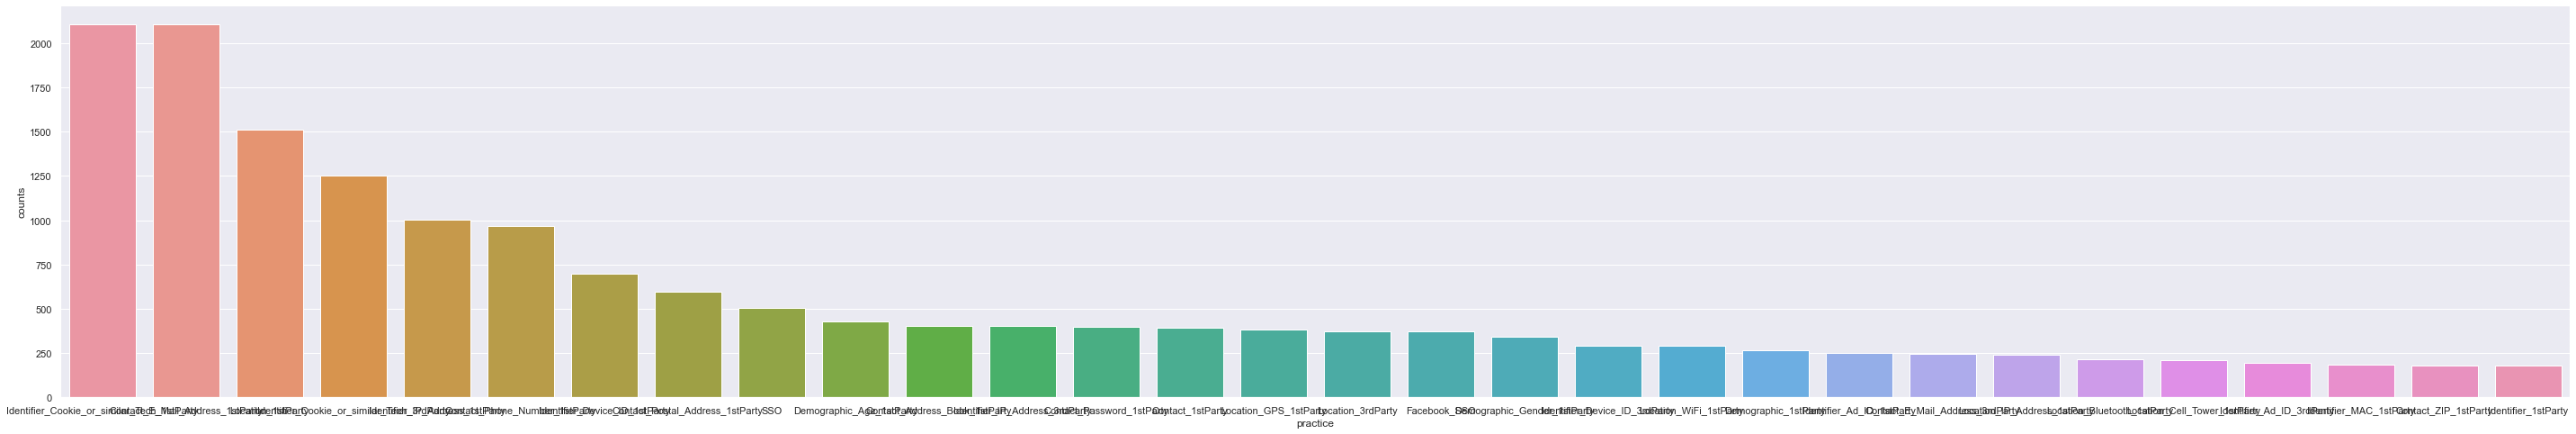

In [6]:
sns.set(rc = {'figure.figsize':(50,8)})
ax = sns.barplot(x = "practice", y = "counts", data = df_by_practice[:30])

### Sentence length statistics: by word, correlations between length and practice?

In [7]:
# Duplicate df
df_sentence_statistics = df

import re

In [8]:
df_sentence_statistics["sentence_length"] = df_sentence_statistics["sentence_text"].apply(lambda sen: len(re.findall(r'\w+', sen)))

In [9]:
df_sentence_statistics["sentence_length"].describe()

count    18829.000000
mean        29.779170
std         22.885182
min          1.000000
25%         16.000000
50%         25.000000
75%         37.000000
max        496.000000
Name: sentence_length, dtype: float64

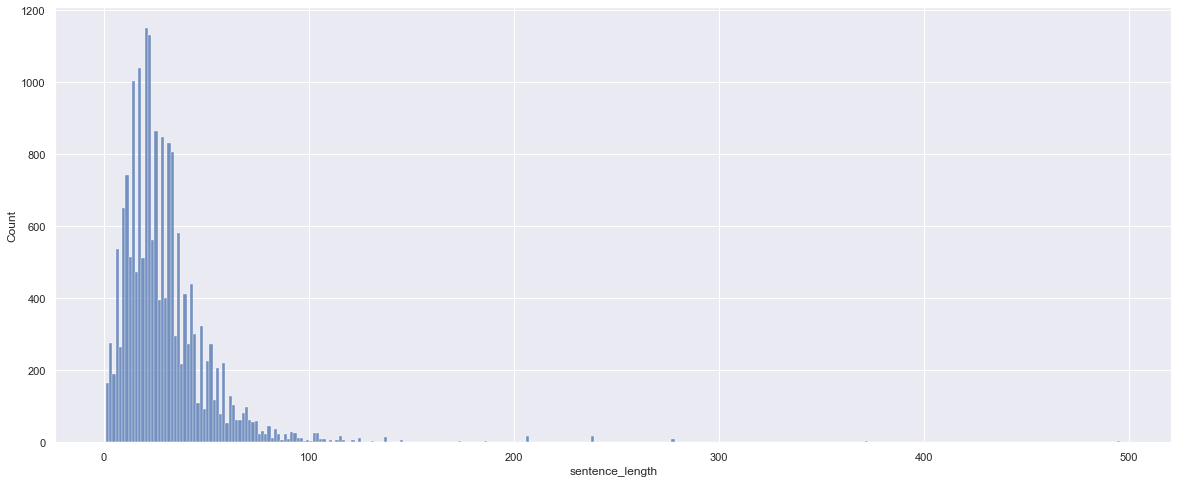

In [10]:
# Histogram of sentence length
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.histplot(x = "sentence_length",  data = df_sentence_statistics)

In [19]:
## Average Sentence length by type of practice
df_sentence_statistics.groupby(["practice"]).mean().sort_values(by = "sentence_length", ascending=False).head()

,sentence_length
practice,
Identifier_SSID_BSSID_3rdParty,65.500000
Identifier_IMSI_3rdParty,54.250000
Identifier_IMSI_1stParty,48.153846
Identifier_Mobile_Carrier_3rdParty,47.057143
Identifier_SIM_Serial_3rdParty,41.200000


In [18]:
# Median sentence length by practice
df_sentence_statistics.groupby(["practice"]).median().sort_values(by = "sentence_length", ascending=False).head()

,sentence_length
practice,
Identifier_SSID_BSSID_3rdParty,65.5
Identifier_SIM_Serial_3rdParty,54.0
Identifier_IMSI_3rdParty,47.5
Identifier_IMSI_1stParty,44.0
Contact_ZIP_3rdParty,41.0


In [13]:
# Concat to df_by_practice
df_by_practice = pd.merge(left = df_by_practice, right = df_sentence_statistics.groupby(["practice"]).mean(), how = "outer", left_on = "practice", right_on = "practice", suffixes = (None, "_mean"))

In [14]:
df_by_practice = pd.merge(left = df_by_practice, right = df_sentence_statistics.groupby(["practice"]).median(), how = "outer", left_on = "practice", right_on = "practice", suffixes = (None, "_median"))

In [15]:
# Sanity check
df_by_practice.head()

,practice,counts,sentence_length,sentence_length_median
0,Identifier_Cookie_or_similar_Tech_1stParty,2107,25.389654,22.0
1,Contact_E_Mail_Address_1stParty,2106,28.651472,25.0
2,Location_1stParty,1514,29.159181,24.0
3,Identifier_Cookie_or_similar_Tech_3rdParty,1250,27.318400,24.0
4,Identifier_IP_Address_1stParty,1005,30.913433,27.0


In [17]:
df_by_practice.rename(columns = {"sentence_length":"sentence_length_mean"}, inplace=True)
df_by_practice.head()

,practice,counts,sentence_length_mean,sentence_length_median
0,Identifier_Cookie_or_similar_Tech_1stParty,2107,25.389654,22.0
1,Contact_E_Mail_Address_1stParty,2106,28.651472,25.0
2,Location_1stParty,1514,29.159181,24.0
3,Identifier_Cookie_or_similar_Tech_3rdParty,1250,27.318400,24.0
4,Identifier_IP_Address_1stParty,1005,30.913433,27.0


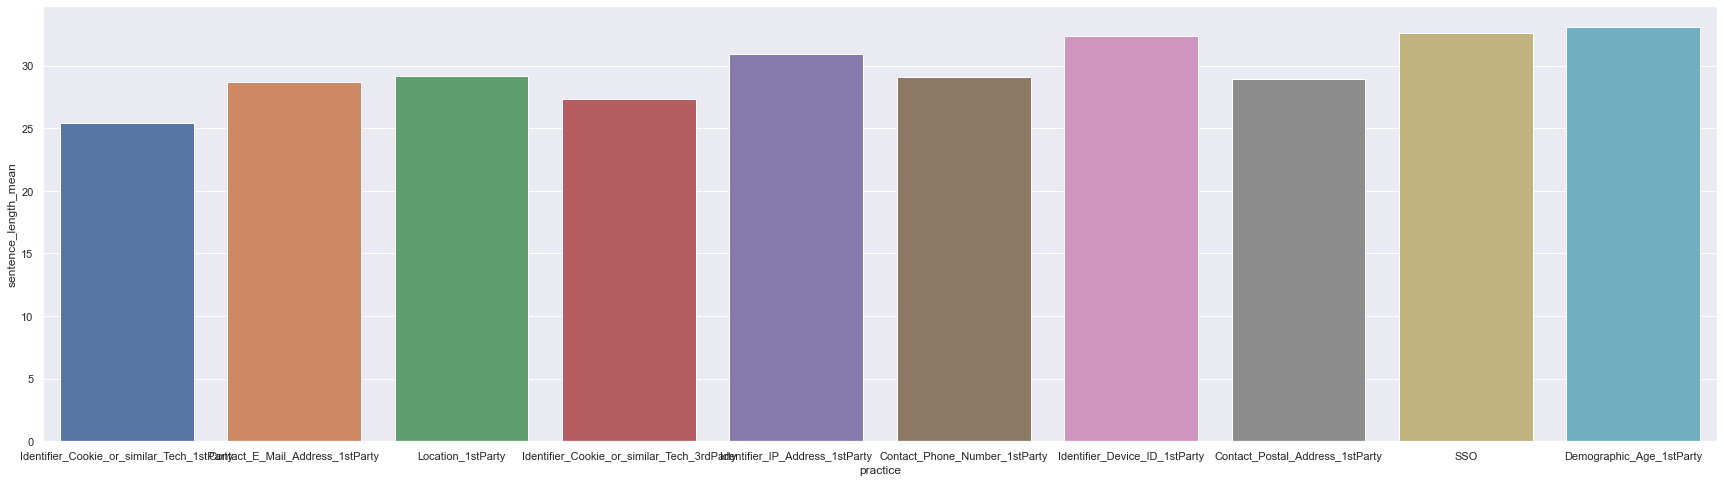

In [21]:
# Plotting top 10 sentence statisitcs
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.barplot(x = "practice", y = "sentence_length_mean",  data = df_by_practice[:10])

In [22]:
df_by_practice["sentence_length_mean"][:10].describe()

count    10.000000
mean     29.747511
std       2.468191
min      25.389654
25%      28.715572
50%      29.138353
75%      32.011357
max      33.074766
Name: sentence_length_mean, dtype: float64

Not much variation in sentence length for the top 10 frequently recurring practices.

In [28]:
## Looking at propotion of counts per practice 
df_by_practice["counts_proportion"] = df_by_practice["counts"].apply(lambda count: count / df_by_practice["counts"].sum())

df_by_practice.head(10)

,practice,counts,sentence_length_mean,sentence_length_median,counts_proportion
0,Identifier_Cookie_or_similar_Tech_1stParty,2107,25.389654,22.0,0.111902
1,Contact_E_Mail_Address_1stParty,2106,28.651472,25.0,0.111849
2,Location_1stParty,1514,29.159181,24.0,0.080408
3,Identifier_Cookie_or_similar_Tech_3rdParty,1250,27.318400,24.0,0.066387
4,Identifier_IP_Address_1stParty,1005,30.913433,27.0,0.053375
5,Contact_Phone_Number_1stParty,970,29.117526,25.0,0.051516
6,Identifier_Device_ID_1stParty,697,32.377331,28.0,0.037017
7,Contact_Postal_Address_1stParty,597,28.907873,26.0,0.031706
8,SSO,504,32.565476,28.0,0.026767
9,Demographic_Age_1stParty,428,33.074766,26.0,0.022731


In [30]:
df_by_practice["counts_proportion"][:10].sum()

0.5936587179351003

Top 10 frequently recurring practices compose of 60% of all practices in the dataset.

### Looking at the practices with the fewest counts 

In [26]:
df_by_practice.tail(10)

,practice,counts,sentence_length_mean,sentence_length_median
48,Identifier_Mobile_Carrier_3rdParty,35,47.057143,30.0
49,Contact_ZIP_3rdParty,34,40.176471,41.0
50,Identifier_SSID_BSSID_1stParty,33,28.060606,24.0
51,Contact_Password_3rdParty,33,24.181818,20.0
52,Contact_City_3rdParty,24,18.000000,14.0
53,Contact_Address_Book_3rdParty,17,39.647059,34.0
54,Identifier_IMSI_1stParty,13,48.153846,44.0
55,Identifier_SIM_Serial_3rdParty,5,41.200000,54.0
56,Identifier_IMSI_3rdParty,4,54.250000,47.5
57,Identifier_SSID_BSSID_3rdParty,2,65.500000,65.5


In [27]:
df_by_practice.tail(10).describe()

,counts,sentence_length_mean,sentence_length_median
count,10.000000,10.000000,10.000000
mean,20.000000,40.622694,37.400000
std,13.490738,14.314263,16.055113
min,2.000000,18.000000,14.000000
25%,7.000000,30.957219,25.500000
50%,20.500000,40.688235,37.500000
75%,33.000000,47.879670,46.625000
max,35.000000,65.500000,65.500000


Much more variation with higher std: around 38 words vs 2.4 for the top 10 most frequently recurring.
But then could be because of low frequency. So might not be statisitcally significant.